In [29]:
import pandas as pd
ue_data = pd.read_csv('Exploration.csv')
ue_data = ue_data.drop(columns=['Unnamed: 0', 'anime_id'])
ue_data

,title,type,source,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,min_duration,op_artists,ed_artists
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,24.0,MUCC,"MUCC,:, Ririchiyo Shirakiin (Rina Hidaka),:, K..."
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,24.0,SUN&LUNAR,"Asuka Hinoi (1-13, 26)"
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,24.0,"Shugo Chara Egg,:, Guardians 4","Buono!,:, Buono!"
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,16.0,Ritsuko Okazaki,Ritsuko Okazaki
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,24.0,nano.RIPE,"Sphere,:, nano.RIPE"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,Maabou no Daikyousou,Movie,Original,1,G - All Ages,4.62,NaN,NaN,"Comedy, Sports",NaN,True,1,1.0,NaN,NaN
8118,Ebenbourg no Kaze,OVA,Visual novel,2,Rx - Hentai,5.72,NuTech Digital,NaN,Hentai,Summer,False,1,29.0,NaN,NaN
8119,Alexander Senki,TV,Unknown,13,R+ - Mild Nudity,5.80,"Kadokawa Shoten, TBS",Madhouse,"Action, Adventure, Fantasy, Historical, Sci-Fi...",Fall,True,2,20.0,Yuki Koyanagi [Japanese Version],NaN
8120,Mahou Shoujo Madoka★Magica: Concept Movie,Movie,Original,1,PG-13 - Teens 13 or older,7.14,NaN,Shaft,"Drama, Magic, Psychological, Thriller",Fall,True,0,4.0,NaN,NaN


## First as we have explored, we will make a column for the title_length
We will also change the index to that of the title

In [30]:
def check_titles(set):
    title_count = {}
    for title in set['title']:
        if title in title_count:
            title_count[title] += 1
        else:
            title_count[title] = 1
    duplicates = [title for title, count in title_count.items() if count > 1]

    if duplicates:
        print("Duplicate titles found:")
        for title in duplicates:
            print(title)
            print(title_count[title], "occurrences")
    else:
        print("No duplicate titles found")

In [31]:
title_len = ue_data.copy()
title_len['title_len'] = title_len['title'].apply(len)

check_titles(ue_data)

No duplicate titles found


In [32]:
#should not run twice
wanna_find = 'Hinamatsuri'
for index, row in title_len.iterrows():
    title = row['title']
    if title == wanna_find:
        title_len.loc[index, 'title'] = wanna_find + "1"
        break
check_titles(title_len)

No duplicate titles found


In [33]:
title_len.index = title_len['title']
title_len = title_len.drop(columns=['title'])
title_len

,type,source,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,min_duration,op_artists,ed_artists,title_len
title,,,,,,,,,,,,,,,
Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,24.0,MUCC,"MUCC,:, Ririchiyo Shirakiin (Rina Hidaka),:, K...",13
Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,24.0,SUN&LUNAR,"Asuka Hinoi (1-13, 26)",16
Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,24.0,"Shugo Chara Egg,:, Guardians 4","Buono!,:, Buono!",18
Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,16.0,Ritsuko Okazaki,Ritsuko Okazaki,13
Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,24.0,nano.RIPE,"Sphere,:, nano.RIPE",19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maabou no Daikyousou,Movie,Original,1,G - All Ages,4.62,NaN,NaN,"Comedy, Sports",NaN,True,1,1.0,NaN,NaN,20
Ebenbourg no Kaze,OVA,Visual novel,2,Rx - Hentai,5.72,NuTech Digital,NaN,Hentai,Summer,False,1,29.0,NaN,NaN,17
Alexander Senki,TV,Unknown,13,R+ - Mild Nudity,5.80,"Kadokawa Shoten, TBS",Madhouse,"Action, Adventure, Fantasy, Historical, Sci-Fi...",Fall,True,2,20.0,Yuki Koyanagi [Japanese Version],NaN,15


### Next lets to one hot encoding on the relevent columns

First source

In [34]:
source_ohe = title_len.copy()
#source_ohe = source_ohe[source_ohe['source'] != 'Unknown']
one_hot_encoder = pd.get_dummies(source_ohe['source'], prefix='source')
source_ohe = pd.concat([source_ohe, one_hot_encoder], axis=1)
source_ohe.drop(columns=['source'], inplace=True)
source_ohe

,type,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,...,source_Manga,source_Music,source_Novel,source_Original,source_Other,source_Picture book,source_Radio,source_Unknown,source_Visual novel,source_Web manga
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,TV,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,...,True,False,False,False,False,False,False,False,False,False
Seto no Hanayome,TV,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,...,True,False,False,False,False,False,False,False,False,False
Shugo Chara!! Doki,TV,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,...,True,False,False,False,False,False,False,False,False,False
Princess Tutu,TV,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,...,False,False,False,True,False,False,False,False,False,False
Bakuman. 3rd Season,TV,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maabou no Daikyousou,Movie,1,G - All Ages,4.62,NaN,NaN,"Comedy, Sports",NaN,True,1,...,False,False,False,True,False,False,False,False,False,False
Ebenbourg no Kaze,OVA,2,Rx - Hentai,5.72,NuTech Digital,NaN,Hentai,Summer,False,1,...,False,False,False,False,False,False,False,False,True,False
Alexander Senki,TV,13,R+ - Mild Nudity,5.80,"Kadokawa Shoten, TBS",Madhouse,"Action, Adventure, Fantasy, Historical, Sci-Fi...",Fall,True,2,...,False,False,False,False,False,False,False,True,False,False


Now type

In [35]:
type_ohe = source_ohe.copy()
unique_types = type_ohe['type'].unique()
one_hot_encoder = pd.get_dummies(type_ohe['type'], prefix='type')
type_ohe = pd.concat([type_ohe, one_hot_encoder], axis=1)
type_ohe.drop(columns=['type'], inplace=True)
print(unique_types)
type_ohe

['TV' 'Music' 'OVA' 'Special' 'Movie' 'ONA']


,episodes,rating,score,producer,studio,genre,release_season,is_licensed,nr_synonyms,min_duration,...,source_Radio,source_Unknown,source_Visual novel,source_Web manga,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,12,PG-13 - Teens 13 or older,7.63,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",David Production,"Comedy, Supernatural, Romance, Shounen",Winter,True,1,24.0,...,False,False,False,False,False,False,False,False,False,True
Seto no Hanayome,26,PG-13 - Teens 13 or older,7.89,"TV Tokyo, AIC, Square Enix, Sotsu",Gonzo,"Comedy, Parody, Romance, School, Shounen",Spring,True,1,24.0,...,False,False,False,False,False,False,False,False,False,True
Shugo Chara!! Doki,51,PG - Children,7.55,"TV Tokyo, Sotsu",Satelight,"Comedy, Magic, School, Shoujo",Fall,True,2,24.0,...,False,False,False,False,False,False,False,False,False,True
Princess Tutu,38,PG-13 - Teens 13 or older,8.21,"Memory-Tech, GANSIS, Marvelous AQL",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",Summer,True,0,16.0,...,False,False,False,False,False,False,False,False,False,True
Bakuman. 3rd Season,25,PG-13 - Teens 13 or older,8.67,"NHK, Shueisha",J.C.Staff,"Comedy, Drama, Romance, Shounen",Fall,True,1,24.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maabou no Daikyousou,1,G - All Ages,4.62,NaN,NaN,"Comedy, Sports",NaN,True,1,1.0,...,False,False,False,False,True,False,False,False,False,False
Ebenbourg no Kaze,2,Rx - Hentai,5.72,NuTech Digital,NaN,Hentai,Summer,False,1,29.0,...,False,False,True,False,False,False,False,True,False,False
Alexander Senki,13,R+ - Mild Nudity,5.80,"Kadokawa Shoten, TBS",Madhouse,"Action, Adventure, Fantasy, Historical, Sci-Fi...",Fall,True,2,20.0,...,False,True,False,False,False,False,False,False,False,True


Genre

In [36]:
genre_ohe = type_ohe.copy()

nan_count_before = genre_ohe['genre'].isnull().sum()
print("NaN count:", nan_count_before)

#There are only 56 NaN values, so we will just remove them

genre_ohe = genre_ohe.dropna(subset=['genre'])

unique_genres = genre_ohe['genre'].str.split(', ').explode().unique()

print(unique_genres)
genre_dummies = genre_ohe['genre'].str.get_dummies(', ')
genre_dummies = genre_dummies.add_prefix('genre_')
genre_ohe = pd.concat([genre_ohe, genre_dummies], axis=1)

genre_ohe.drop('genre', axis=1, inplace=True)

genre_ohe_unique = genre_ohe[genre_dummies.columns]

genre_ohe_unique

NaN count: 2
['Comedy' 'Supernatural' 'Romance' 'Shounen' 'Parody' 'School' 'Magic'
 'Shoujo' 'Drama' 'Fantasy' 'Kids' 'Action' 'Music' 'Slice of Life'
 'Josei' 'Harem' 'Shounen Ai' 'Adventure' 'Super Power' 'Sci-Fi' 'Ecchi'
 'Seinen' 'Martial Arts' 'Game' 'Sports' 'Demons' 'Historical' 'Horror'
 'Mystery' 'Samurai' 'Hentai' 'Psychological' 'Vampire' 'Mecha' 'Military'
 'Space' 'Thriller' 'Yaoi' 'Cars' 'Shoujo Ai' 'Police' 'Dementia' 'Yuri']


,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,genre_Demons,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Game,...,genre_Shounen Ai,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,genre_Yuri
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Seto no Hanayome,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shugo Chara!! Doki,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Princess Tutu,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bakuman. 3rd Season,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maabou no Daikyousou,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Ebenbourg no Kaze,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Senki,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Producer

First ill try to se where the best min. is

In [37]:
producer_ohe = genre_ohe.copy()
producers = producer_ohe['producer'].str.split(', ').explode()
print(producers.__len__())
unique_producers = producers.value_counts()
print(unique_producers)
producers_by_count = {}
for producer, count in unique_producers.items():
    if count in producers_by_count:
        producers_by_count[count].append(producer)
    else:
        producers_by_count[count] = [producer]

avg_score_for_count = {}

for count, producers in producers_by_count.items():
    avg_score = 0
    producer_ohe_cleaned = producer_ohe.dropna(subset=['producer'])
    for producer in producers:
        rows_with_producer = producer_ohe_cleaned[producer_ohe_cleaned['producer'].str.contains(producer)]
        avg_score += rows_with_producer['score'].mean()
    avg_score /= len(producers)
    avg_score_for_count[count] = avg_score

print(avg_score_for_count)
        

15518
producer
Aniplex                    394
Lantis                     374
Bandai Visual              355
TV Tokyo                   350
Movic                      249
                          ... 
Mippei Eigeki Kiryuukan      1
Collaboration Works          1
Viki                         1
Nexon                        1
Rakuten                      1
Name: count, Length: 925, dtype: int64


C:\Users\simso\AppData\Local\Temp\ipykernel_17784\3594941674.py:19: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

C:\Users\simso\AppData\Local\Temp\ipykernel_17784\3594941674.py:19: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



{394: 7.527969543147208, 374: 7.144438502673797, 355: 7.1499154929577475, 350: 7.278054862842893, 249: 7.27140562248996, 221: 7.177407407407407, 218: 7.0777777777777775, 213: 7.600691244239631, 198: 7.168838383838384, 187: 7.283636363636363, 182: 7.454120879120878, 177: 7.28819209039548, 174: 6.961896551724137, 173: 7.160751445086705, 167: 7.536826347305389, 165: 6.517030303030302, 155: 7.643612903225806, 151: 7.1503973509933765, 147: 7.343979591836735, 144: 7.003333333333334, 119: 7.360756302521008, 109: 7.240550458715595, 108: 6.799583333333333, 107: 7.209532710280374, 106: 7.2544811320754725, 105: 7.132761904761904, 97: 7.21061855670103, 96: 7.347291666666667, 92: 7.21554347826087, 87: 7.126206896551726, 81: 7.4548148148148154, 80: 7.23775, 79: 7.139276735050197, 75: 6.483589743589743, 74: 7.63891891891892, 72: 7.472916666666666, 69: 7.2576086956521735, 67: 7.064626865671641, 66: 7.21060606060606, 64: 6.7475000000000005, 63: 7.024531250000001, 62: 7.430322580645162, 61: 6.4718032786

C:\Users\simso\AppData\Local\Temp\ipykernel_17784\3594941674.py:19: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



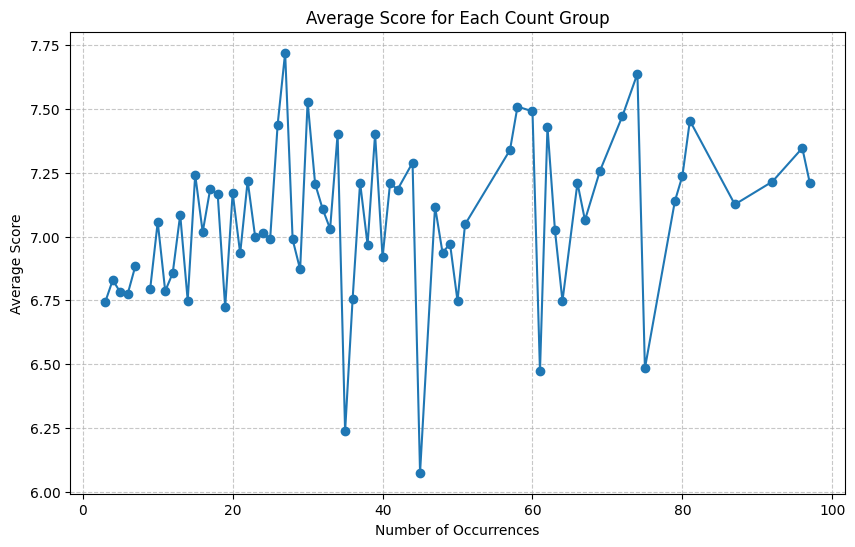

In [38]:
import matplotlib.pyplot as plt

filtered_avg_score_for_count = {count: avg_score for count, avg_score in avg_score_for_count.items() if count <= 100}

# Extract counts and average scores from the filtered dictionary
counts = list(filtered_avg_score_for_count.keys())
avg_scores = list(filtered_avg_score_for_count.values())


plt.figure(figsize=(10, 6))
plt.plot(counts, avg_scores, marker='o', linestyle='-')
plt.xlabel('Number of Occurrences')
plt.ylabel('Average Score')
plt.title('Average Score for Each Count Group')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

I didn't learn much from this... One could also consider looking at the average rating for the producer, but time is flying. Let's say they have to have been involved in at least 20 productions; this threshold might change later. 

In [39]:
#I'm going to try 60 since it feels like it consistently improves scores, and I want a slightly higher 
#trying 70
filter_count = 70
filtered_unique_producers = {producer: count for producer, count in unique_producers.items() if count >= filter_count}
print(filtered_unique_producers)
print(len(filtered_unique_producers))

{'Aniplex': 394, 'Lantis': 374, 'Bandai Visual': 355, 'TV Tokyo': 350, 'Movic': 249, 'Sotsu': 221, 'Pony Canyon': 218, 'Dentsu': 213, 'AT-X': 198, 'Kadokawa Shoten': 187, 'Fuji TV': 182, 'KlockWorx': 177, 'DAX Production': 174, 'TBS': 173, 'Shueisha': 167, 'Pink Pineapple': 165, 'Kodansha': 155, 'Starchild Records': 151, 'Mainichi Broadcasting System': 147, 'Media Factory': 147, 'Genco': 144, 'VAP': 119, 'Nihon Ad Systems': 109, 'Milky Animation Label': 108, 'Showgate': 108, 'Frontier Works': 107, 'TV Asahi': 106, 'Geneon Universal Entertainment': 106, 'Sony Music Entertainment': 105, 'flying DOG': 97, 'NHK': 96, 'Shogakukan Productions': 92, 'Studio Jack': 87, 'Shochiku': 81, 'Magic Capsule': 80, 'Toho': 79, 'Half H.P Studio': 79, 'AIC': 75, 'Nippon Television Network': 74, 'Square Enix': 72}
40


In [40]:
producers = filtered_unique_producers.keys()
prefix = 'producer_'
for producer in producers:
    producer_ohe[prefix + producer] = False

for index, row in producer_ohe.iterrows():
    for producer in producers:
        if pd.notna(row['producer']) and producer in row['producer']:
            producer_ohe.loc[index, prefix + producer] = True

In [41]:
producer_ohe = producer_ohe.drop(columns=['producer'])

In [42]:
keys_with_prefix = [prefix + producer for producer in producers]
rows_with_true_producers = producer_ohe.loc[producer_ohe.any(axis=1), keys_with_prefix]

rows_with_true_producers

,producer_Aniplex,producer_Lantis,producer_Bandai Visual,producer_TV Tokyo,producer_Movic,producer_Sotsu,producer_Pony Canyon,producer_Dentsu,producer_AT-X,producer_Kadokawa Shoten,...,producer_NHK,producer_Shogakukan Productions,producer_Studio Jack,producer_Shochiku,producer_Magic Capsule,producer_Toho,producer_Half H.P Studio,producer_AIC,producer_Nippon Television Network,producer_Square Enix
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
Seto no Hanayome,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
Shugo Chara!! Doki,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Princess Tutu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bakuman. 3rd Season,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maabou no Daikyousou,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ebenbourg no Kaze,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Alexander Senki,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Now to studio

In [43]:
import re
def calculate_avg_score_for_count(unique_counts, data_frame, column_name):
    producers_by_count = {}

    for producer, count in unique_counts.items():
        if count in producers_by_count:
            producers_by_count[count].append(producer)
        else:
            producers_by_count[count] = [producer]

    avg_score_for_count = {}

    for count, producers in producers_by_count.items():
        avg_score = 0
        data_frame_cleaned = data_frame.dropna(subset=[column_name])
        for producer in producers:
            escaped_producer = re.escape(producer)
            rows_with_producer = data_frame_cleaned[data_frame_cleaned[column_name].str.contains(escaped_producer)]
            avg_score += rows_with_producer['score'].mean()
        avg_score /= len(producers)
        avg_score_for_count[count] = avg_score

    return avg_score_for_count

again 20, might change later, maybe only top 20

studio
Toei Animation    416
Sunrise           361
Madhouse          305
J.C.Staff         275
Production I.G    264
                 ... 
Rikuentai           1
Enoki Films         1
An DerCen           1
Japan Taps          1
Felix Film          1
Name: count, Length: 405, dtype: int64


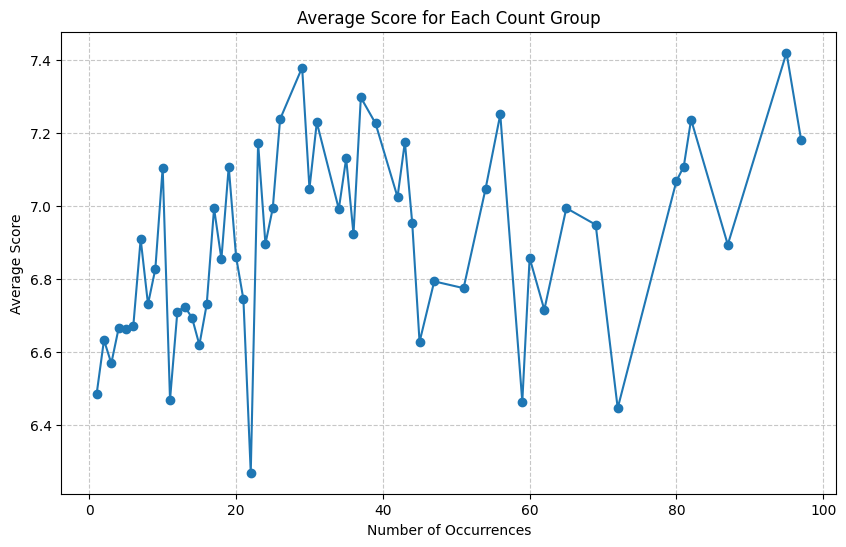

31


In [44]:
studio_ohe = producer_ohe.copy()
studios = studio_ohe['studio'].str.split(', ').explode()
unique_studios = studios.value_counts()
print(unique_studios)

avg_score_studio = calculate_avg_score_for_count(unique_studios, studio_ohe, 'studio')
filtered_avg_score_for_count = {count: avg_score for count, avg_score in avg_score_studio.items() if count <= 100}

counts = list(filtered_avg_score_for_count.keys())
avg_scores = list(filtered_avg_score_for_count.values())
plt.figure(figsize=(10, 6))
plt.plot(counts, avg_scores, marker='o', linestyle='-')
plt.xlabel('Number of Occurrences')
plt.ylabel('Average Score')
plt.title('Average Score for Each Count Group')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()        

#goign to try 35 seems to have made it a little better. Gonna try a little higher, but dont know if its smart to remove all the new/small studios. But gonna try with 50 after that
filter_count = 50

prefix = 'studio_'
filtered_unique_studios = {studio: count for studio, count in unique_studios.items() if count >= filter_count}
print(filtered_unique_studios.__len__())

for studio in filtered_unique_studios.keys():
    studio_ohe[prefix + studio] = False

for index, row in studio_ohe.iterrows():
    for studio in filtered_unique_studios.keys():
        if pd.notna(row['studio']) and studio in row['studio']:
            studio_ohe.loc[index, prefix + studio] = True

studio_ohe = studio_ohe.drop(columns=['studio'])

Now for op and ed artists

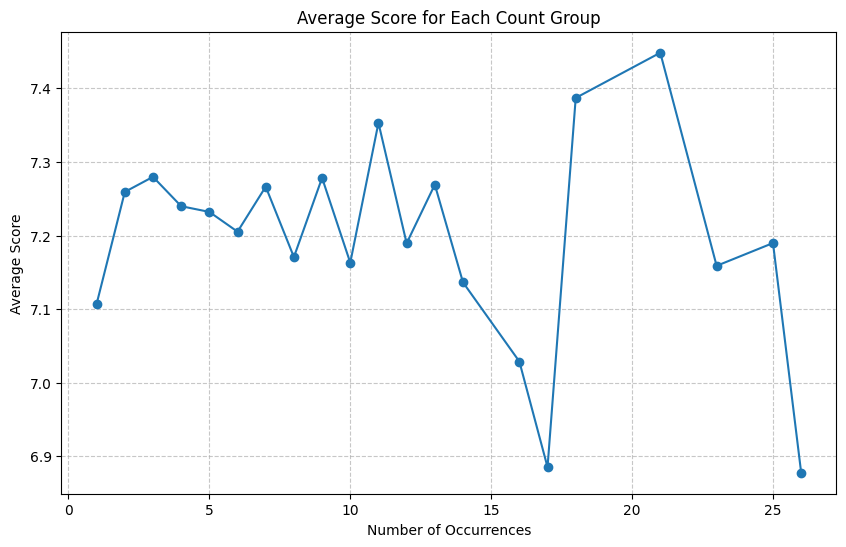

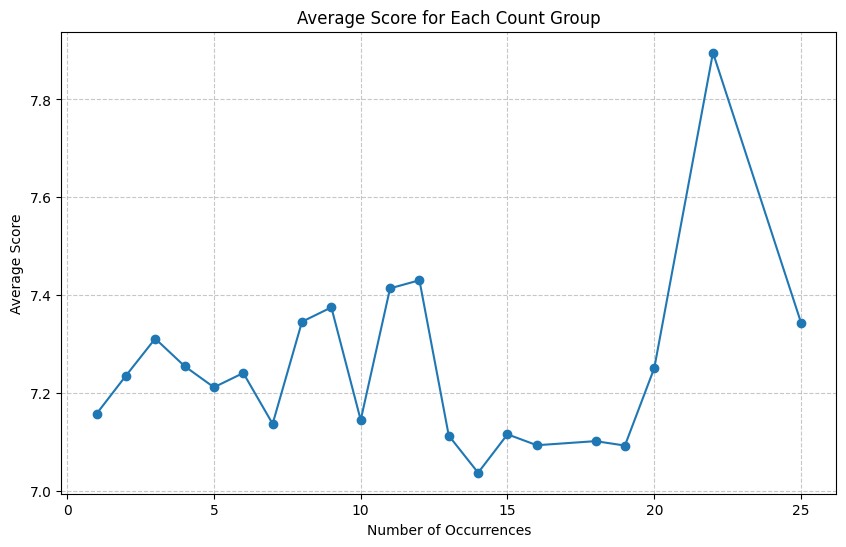

45
36


,op_artist_Hironobu Kageyama,op_artist_Maaya Sakamoto,op_artist_Nana Mizuki,op_artist_JAM Project,op_artist_Minami Kuribayashi,op_artist_ZAQ,op_artist_GRANRODEO,op_artist_angela,op_artist_Megumi Hayashibara,op_artist_Miyuki Hashimoto,...,ed_artist_Faylan,ed_artist_Yukari Tamura,ed_artist_AiM,ed_artist_Koorogi &#039;73,ed_artist_Azumi Asakura,ed_artist_Miyuki Hashimoto,ed_artist_Yui Sakakibara,ed_artist_Ichirou Mizuki,ed_artist_Akino Arai,ed_artist_Rina Satou
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Seto no Hanayome,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Shugo Chara!! Doki,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Princess Tutu,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Bakuman. 3rd Season,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maabou no Daikyousou,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ebenbourg no Kaze,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Alexander Senki,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
artists_ohe = studio_ohe.copy()
op_artists = artists_ohe['op_artists'].str.split(', ').explode()
ed_artists = artists_ohe['ed_artists'].str.split(', ').explode()

unique_op_artists = op_artists.value_counts()
unique_ed_artists = ed_artists.value_counts()

avg_score_op_artists = calculate_avg_score_for_count(unique_op_artists, artists_ohe, 'op_artists')
avg_score_ed_artists = calculate_avg_score_for_count(unique_ed_artists, artists_ohe, 'ed_artists')

filtered_avg_score_for_count_op = avg_score_op_artists
filtered_avg_score_for_count_ed = avg_score_ed_artists

counts_op = list(filtered_avg_score_for_count_op.keys())
avg_scores_op = list(filtered_avg_score_for_count_op.values())

counts_ed = list(filtered_avg_score_for_count_ed.keys())
avg_scores_ed = list(filtered_avg_score_for_count_ed.values())

plt.figure(figsize=(10, 6))
plt.plot(counts_op, avg_scores_op, marker='o', linestyle='-')
plt.xlabel('Number of Occurrences')
plt.ylabel('Average Score')
plt.title('Average Score for Each Count Group')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(counts_ed, avg_scores_ed, marker='o', linestyle='-')
plt.xlabel('Number of Occurrences')
plt.ylabel('Average Score')
plt.title('Average Score for Each Count Group')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


#Keeping it at 10 for now, dont think they have a big importance, but for the check later, i need a few

filter_count = 10
filtered_unique_op_artists = {artist: count for artist, count in unique_op_artists.items() if count >= filter_count}
filtered_unique_ed_artists = {artist: count for artist, count in unique_ed_artists.items() if count >= filter_count}

print(filtered_unique_op_artists.__len__())
print(filtered_unique_ed_artists.__len__())
prefix_op = 'op_artist_'
prefix_ed = 'ed_artist_'

keys_with_prefix_op = [prefix_op + artist for artist in filtered_unique_op_artists.keys()]
keys_with_prefix_ed = [prefix_ed + artist for artist in filtered_unique_ed_artists.keys()]

for artist in filtered_unique_op_artists.keys():
    artists_ohe[prefix_op + artist] = False

for artist in filtered_unique_ed_artists.keys():
    artists_ohe[prefix_ed + artist] = False

for index, row in artists_ohe.iterrows():
    for artist in filtered_unique_op_artists.keys():
        if pd.notna(row['op_artists']) and artist in row['op_artists']:
            artists_ohe.loc[index, prefix_op + artist] = True
    for artist in filtered_unique_ed_artists.keys():
        if pd.notna(row['ed_artists']) and artist in row['ed_artists']:
            artists_ohe.loc[index, prefix_ed + artist] = True

artists_ohe = artists_ohe.drop(columns=['op_artists', 'ed_artists'])

rows_with_true_artists = artists_ohe.loc[artists_ohe.any(axis=1), list(keys_with_prefix_op) + list(keys_with_prefix_ed)]

rows_with_true_artists


In [46]:
#Just checking which columns i havent changed
just_a_check = list(set(ue_data.columns) & set(artists_ohe.columns))
just_a_check

['score',
 'min_duration',
 'release_season',
 'is_licensed',
 'episodes',
 'nr_synonyms',
 'rating']

rating and release_season

In [47]:
final_ohe = artists_ohe.copy()

unique_ratings = final_ohe['rating'].unique()
unique_release_seasons = final_ohe['release_season'].unique()

one_hot_encoder = pd.get_dummies(final_ohe['rating'], prefix='rating')
final_ohe = pd.concat([final_ohe, one_hot_encoder], axis=1)
final_ohe.drop(columns=['rating'], inplace=True)

one_hot_encoder = pd.get_dummies(final_ohe['release_season'], prefix='release_season')
final_ohe = pd.concat([final_ohe, one_hot_encoder], axis=1)
final_ohe.drop(columns=['release_season'], inplace=True)

final_ohe

,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,source_Digital manga,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,rating_Rx - Hentai,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,12,7.63,True,1,24.0,13,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
Seto no Hanayome,26,7.89,True,1,24.0,16,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Shugo Chara!! Doki,51,7.55,True,2,24.0,18,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
Princess Tutu,38,8.21,True,0,16.0,13,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
Bakuman. 3rd Season,25,8.67,True,1,24.0,19,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maabou no Daikyousou,1,4.62,True,1,1.0,20,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
Ebenbourg no Kaze,2,5.72,False,1,29.0,17,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
Alexander Senki,13,5.80,True,2,20.0,15,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


# Lets do some checks with the data

First check nans and remove or replace

In [48]:
nan_counts = final_ohe.isnull().sum()
columns_with_nans = nan_counts[nan_counts > 0]
print(f"Total NaNs in the dataset: {final_ohe.isnull().sum().sum()}")
print("Columns with NaNs and their counts:")
print(columns_with_nans)

#we are simply gonna remove the rows with NaNs. Not a lot left

final_ohe = final_ohe.dropna()

Total NaNs in the dataset: 11
Columns with NaNs and their counts:
min_duration    11
dtype: int64


## Correlation matrix

In [49]:
import plotly.express as px
import seaborn as sns
import numpy as np
correlation_min = 0.70

correlation_matrix = final_ohe.corr()
np.fill_diagonal(correlation_matrix.values, 0) #removing self-correlation
filtered_corr_matrix = correlation_matrix[((correlation_matrix >= correlation_min) | (correlation_matrix <= -correlation_min))]
filtered_corr_matrix.dropna(how='all', axis=0, inplace=True)
filtered_corr_matrix.dropna(how='all', axis=1, inplace=True)

fig = px.imshow(filtered_corr_matrix, 
                text_auto=True, 
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1, 
                aspect="auto")

fig.update_layout(
    title="Filtered Correlation Matrix Heatmap",
    xaxis_title="Variables",
    yaxis_title="Variables"
)
fig.show()


This suggests that it might be beneficial to either drop some columns or combine them into one, as they exhibit a high correlation and essentially convey similar meanings. However, before making any decisions, I'll first try a simple random forest model to see if it can provide some insights.

The number of columns has decreased after tweaking some parameters, following the insights from the random forest feature importance analysis. However, I'm still considering combining the 'rating_rx' and 'hentai' genre columns since they are so similar.

Mean Squared Error: 0.32935284719567237
R-squared: 0.5270511572447215
                          feature  importance
204     ed_artist_Masuda Toshio,:    0.000000
217    ed_artist_Miyuki Hashimoto    0.000008
149  op_artist_Megumi Hayashibara    0.000012
219      ed_artist_Ichirou Mizuki    0.000016
203       ed_artist_Asami Shimoda    0.000020
..                            ...         ...
131                   studio_Arms    0.000652
119                    studio_OLM    0.000672
29                     genre_Cars    0.000702
102          producer_Studio Jack    0.000709
89         producer_Media Factory    0.000721

[100 rows x 2 columns]


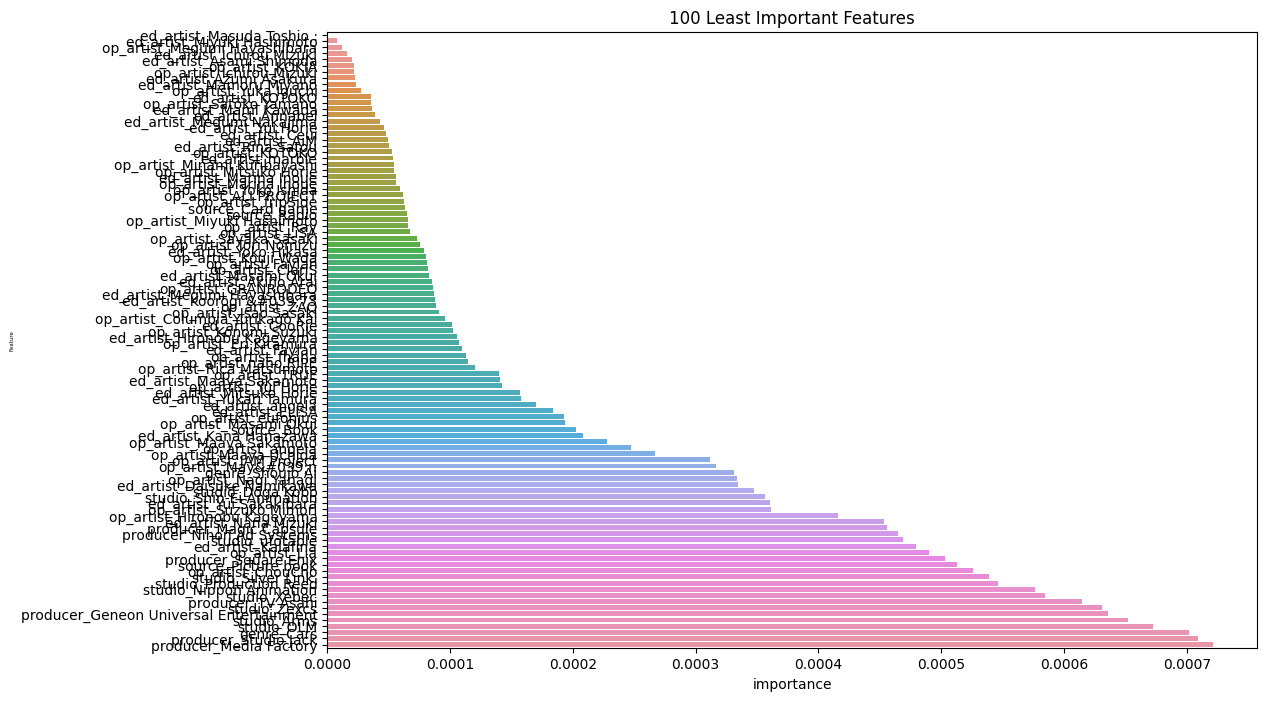

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y = final_ohe['score']
X = final_ohe.drop(columns=['score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

feature_importances = rf_regressor.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
}).sort_values(by='importance', ascending=True)

least_important_features = feature_importance_df.head(100)
print(least_important_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=least_important_features)
plt.title('100 Least Important Features')
plt.ylabel('Feature', fontsize=4)
plt.show()

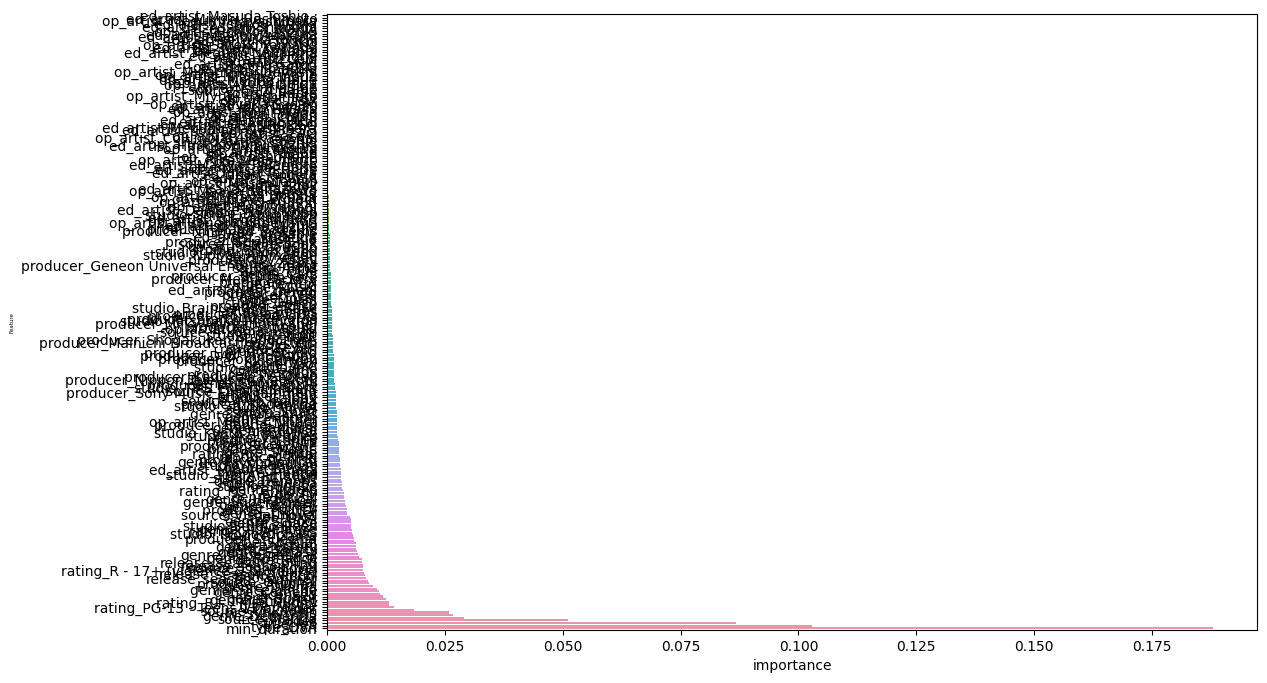

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.ylabel('Feature', fontsize=4)
plt.show()

                             feature  importance
204        ed_artist_Masuda Toshio,:    0.000000
217       ed_artist_Miyuki Hashimoto    0.000008
149     op_artist_Megumi Hayashibara    0.000012
219         ed_artist_Ichirou Mizuki    0.000016
203          ed_artist_Asami Shimoda    0.000020
168                  op_artist_KOKIA    0.000022
177         op_artist_Ichirou Mizuki    0.000022
216          ed_artist_Azumi Asakura    0.000023
200          ed_artist_Mamoru Miyano    0.000024
170            op_artist_Yuka Iguchi    0.000027
198                 ed_artist_KOTOKO    0.000035
176          op_artist_Satoko Yamano    0.000035
206            ed_artist_Mami Kawada    0.000036
207                ed_artist_Annabel    0.000039
208        ed_artist_Megumi Nakajima    0.000043
192              ed_artist_Yui Horie    0.000046
211                   ed_artist_Ceui    0.000048
214                    ed_artist_AiM    0.000049
221             ed_artist_Rina Satou    0.000051
182                 

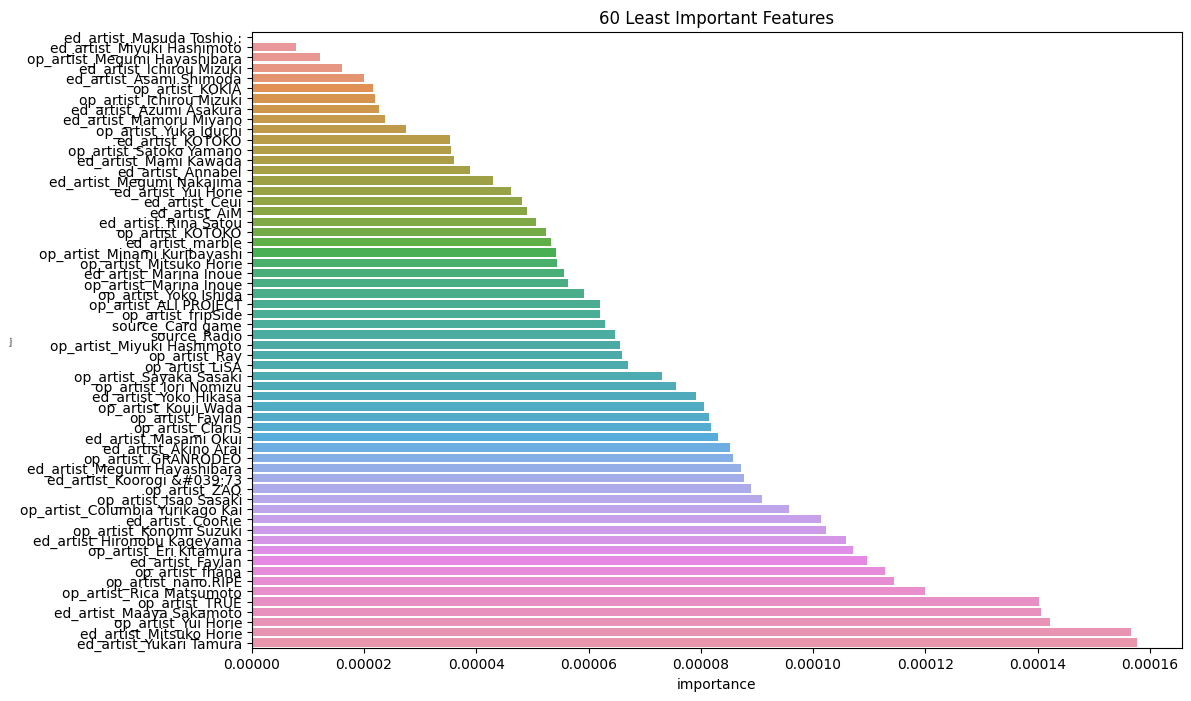

In [52]:
least_important_features = feature_importance_df.head(60)
print(least_important_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=least_important_features)
plt.title('60 Least Important Features')
plt.ylabel('Feature', fontsize=2)
plt.show()

                                   feature  importance
38                            genre_Hentai    0.002922
110                  studio_Toei Animation    0.002940
113                       studio_J.C.Staff    0.002952
32                            genre_Demons    0.002983
45                             genre_Mecha    0.003027
111                         studio_Sunrise    0.003069
43                             genre_Magic    0.003133
223                   rating_PG - Children    0.003274
26                                 type_TV    0.003453
47                             genre_Music    0.003556
39                        genre_Historical    0.003639
64                       genre_Super Power    0.003661
46                          genre_Military    0.003752
56                            genre_Seinen    0.003956
80                        producer_Fuji TV    0.004111
66                          genre_Thriller    0.004197
19                     source_Visual novel    0.004247
23        

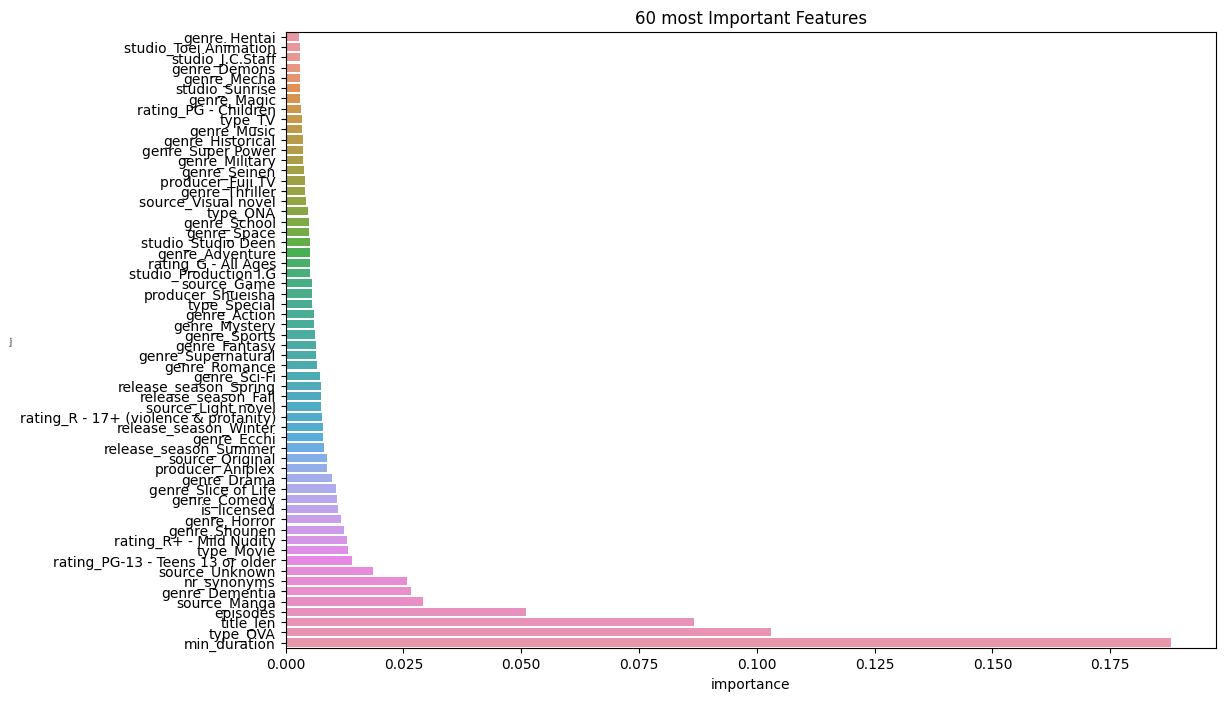

In [53]:
least_important_features = feature_importance_df.tail(60)
print(least_important_features)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=least_important_features)
plt.title('60 most Important Features')
plt.ylabel('Feature', fontsize=2)
plt.show()

So, lets check how big the correlation is between feature importance shown here and the old features. Genre and so on

In [54]:
#first time i ran though, from this i feel confident in that ed and op doesnt have a big impact. They almost filed up the least important and none in most. Plus didnt personally think they would have a big impact 
# producer studio might have bigger impact if i include less. 
#            prefix  importance    
#2       op_artist_    0.000057
#0       ed_artist_    0.000058
#4        producer_    0.000419
#8          studio_    0.000529
#1           genre_    0.003954
#7          source_    0.007213
#6  release_season_    0.007542
#9            type_    0.009151
#5          rating_    0.013262
#3            other    0.086195


#second time
#            prefix  importance
#2       op_artist_    0.000059
#0       ed_artist_    0.000071
#8          studio_    0.000790
#4        producer_    0.000870
#1           genre_    0.004058
#7          source_    0.007302
#6  release_season_    0.007871
#9            type_    0.009212
#5          rating_    0.013349
#3            other    0.087762

In [55]:
prefixes = ['source_', 'type_', 'genre_', 'producer_', 'studio_', 'op_artist_', 'ed_artist_', 'rating_', 'release_season_']
feature_importance_df_copy = feature_importance_df.copy()

feature_importance_df['prefix'] = feature_importance_df['feature'].apply(lambda x: next((p for p in prefixes if x.startswith(p)), 'other'))
average_importance_df = feature_importance_df.groupby('prefix').agg({'importance': 'mean'}).reset_index()

print(average_importance_df.sort_values(by='importance'))




            prefix  importance
2       op_artist_    0.000206
0       ed_artist_    0.000214
8          studio_    0.001574
4        producer_    0.001704
1           genre_    0.004930
7          source_    0.005234
5          rating_    0.007643
6  release_season_    0.007726
9            type_    0.021819
3            other    0.072540


Happy with this for now. Lets remove the ed and op artists. I haven't tried to fit the random forest model in this case, just wanted some insights, so don't want to remove to much.

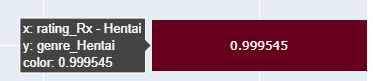

In [56]:
final_cleaning = final_ohe.copy()

columns_to_drop = final_cleaning.columns[final_cleaning.columns.str.startswith(('op_artist_', 'ed_artist_'))]
final_cleaning = final_cleaning.drop(columns=columns_to_drop)

final_cleaning["Hentai"] = False

for index, row in final_cleaning.iterrows():
    rating_Rx_Hentai = bool(row['rating_Rx - Hentai'])
    genre_Hentai = bool(row['genre_Hentai'])
    final_cleaning.loc[index, 'Hentai'] = rating_Rx_Hentai or genre_Hentai
final_cleaning = final_cleaning.drop(columns=['rating_Rx - Hentai', 'genre_Hentai'])

print(final_cleaning['Hentai'])

final_cleaning.to_csv('DataPrepared.csv')

final_cleaning

title
Inu x Boku SS                                False
Seto no Hanayome                             False
Shugo Chara!! Doki                           False
Princess Tutu                                False
Bakuman. 3rd Season                          False
                                             ...  
Maabou no Daikyousou                         False
Ebenbourg no Kaze                             True
Alexander Senki                              False
Mahou Shoujo Madoka★Magica: Concept Movie    False
IS: Infinite Stratos 2 - World Purge-hen     False
Name: Hentai, Length: 8109, dtype: bool


,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,source_Digital manga,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
title,,,,,,,,,,,,,,,,,,,,,
Inu x Boku SS,12,7.63,True,1,24.0,13,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
Seto no Hanayome,26,7.89,True,1,24.0,16,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
Shugo Chara!! Doki,51,7.55,True,2,24.0,18,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
Princess Tutu,38,8.21,True,0,16.0,13,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
Bakuman. 3rd Season,25,8.67,True,1,24.0,19,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maabou no Daikyousou,1,4.62,True,1,1.0,20,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
Ebenbourg no Kaze,2,5.72,False,1,29.0,17,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
Alexander Senki,13,5.80,True,2,20.0,15,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
